In [ ]:
## DATA
# 

In [6]:
import pandas as pd
import statistics 
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

In [1]:
import utils.dataset_metrics as dt


In [11]:
articles_df = pd.read_csv('articles/shared_articles.csv')
articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']
interactions_df = pd.read_csv('articles/users_interactions.csv')
interactions_df = interactions_df[['timestamp','eventType', 'contentId','personId','sessionId']]
interactions_df = interactions_df[interactions_df['contentId'].isin(articles_df['contentId'])]

In [4]:
articles_df.shape

(3047, 13)

### Convert interaction to our cases and to Rating

In [12]:
change_interaction = {
   'VIEW': 'CLICK',
   'LIKE': 'EXPLICIT', 
   'BOOKMARK': 'SAVE', 
   'FOLLOW': 'TIME_OPEN',
   'COMMENT CREATED': 'RECOMMEND',  
}

values_interaction = {
    'CLICK' : 2.0,
    'EXPLICIT' : 5.0,
    'SAVE': 3.0,
    'TIME_OPEN': 3.0,
    'RECOMMEND': 3.5
}

interactions_def = dt.convert_interactions(change_interaction, values_interaction, interactions_df)
# users_ids = list(interactions_df.personId.unique())

### Partition of interactions - to inspect data

In [21]:
interactions_ordered = interactions_def
sparsities = []
subs = []
number_users = []
number_items = []
m3 = []
for i in range(1, round(interactions_ordered.shape[0]/1000), 2):
    if i < 70 and i != 0 :
        N_interactions = i*1000
    if i == 70  and i != 0:
        N_interactions = interactions_ordered.shape[0]
    else:
        pass
    subs.append(N_interactions)
    utility_matrix, interactions_subset = dt.get_subset(interactions_ordered, N_interactions)
    ids_users = list(interactions_subset.personId.unique())
    ids_items = list(interactions_subset.contentId.unique())
    sparsities.append(dt.get_overall_sparsity(utility_matrix))
    number_users.append(len(ids_users))
    number_items.append(len(ids_items))

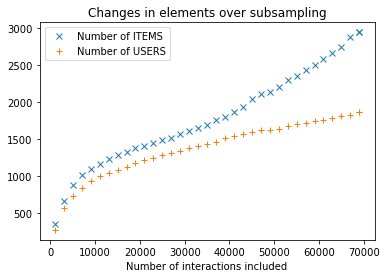

In [22]:
x = subs
y = [number_items, number_users]
labels = ['Number of ITEMS' , 'Number of USERS']
markers = ['x' , '+']

for i,j in enumerate(y):
    plt.plot(x, j, markers[i], label= labels[i])
plt.title('Changes in elements over subsampling')
plt.xlabel('Number of interactions included')
plt.legend(numpoints=1)

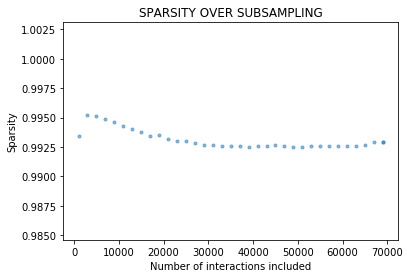

In [23]:
area = np.pi*3
plt.scatter(subs, sparsities, s=area, alpha=0.5)
plt.title('SPARSITY OVER SUBSAMPLING')
plt.xlabel('Number of interactions included')
plt.ylabel('Sparsity')
plt.show()

# SPLIT DATA FOR DIFFERENT TESTS 
## 1. 10,00 interactions
## 2. 40,000 interactions
## 3. whole dataset - around 72,000 interactions

In [218]:
subsets = [1000, 40000, interactions_ordered.shape[0]]
for i in subsets:
    matrix, interactions_final = df.get_subset(interactions_ordered, i)
    name = "objects/subset_{}.pkl".format(i)
    with open(name, 'wb') as f:  
        pickle.dump([matrix, interactions_final], f)

In [24]:
with open('objects/subset_1000.pkl', 'rb') as f:  
    utility_matrix_1, interactions_work_1 = pickle.load(f)
with open('objects/subset_40000.pkl', 'rb') as f:  
    utility_matrix_2, interactions_work_2 = pickle.load(f)
with open('objects/subset_72269.pkl', 'rb') as f:  
    utility_matrix_3, interactions_work_3 = pickle.load(f)

In [25]:
users1 = interactions_work_1.personId.unique()
users2 = interactions_work_2.personId.unique()
users3 = interactions_work_3.personId.unique()

In [221]:
users_temp2 = [i for i in users2 if i not in users1] ##users that appear in temp2

In [226]:
USER = random.choice(users1)
USER

'-3596626804281480007'

## METRICS

In [27]:
USER = '-3596626804281480007'

### M1 - User activity for this subset

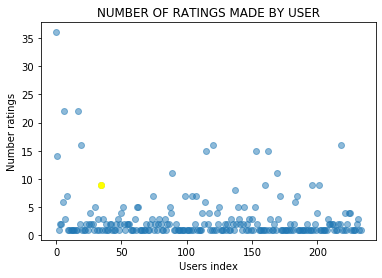

DEVIATION = 4.0 
MEDIAN = 1.0 
MEAN = 2


In [31]:
M1 = dt.get_metric1(USER, utility_matrix_1)
dt.plot_user_activity_m1(utility_matrix_1, USER)

## M3 - Items activity for this subset

0.101


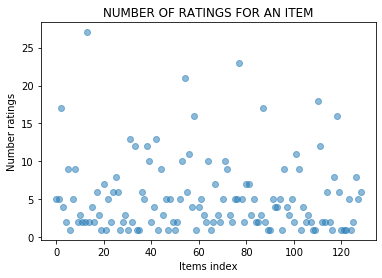

DEVIATION = 4.795831523312719 
MEDIAN = 4 
MEAN = 5


In [32]:
M3 = dt.get_metric3(utility_matrix_1)
print(M3)
dt.plot_items_activity_m3(utility_matrix_1)

## M4 - Items descriptors

In [33]:
with open('objects/tfidf.pkl', 'rb') as f:  
    tfidf_matrix, tfidf_feature_names, full_item_ids = pickle.load(f)

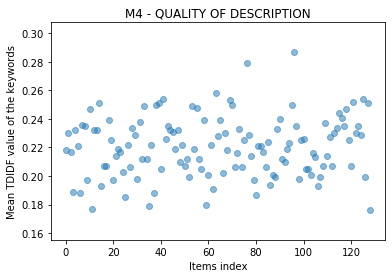

DEVIATION = 0.02075571976831387 
MEDIAN = 0.221 
MEAN = 0.22071317829457365
0.221


In [38]:
mean_q = dt.plot_quality_descriptors(utility_matrix_1,  tfidf_matrix, tfidf_feature_names, full_item_ids)
M4 = round(mean_q,3)
print(M4)